In [80]:
import numpy as np
from PIL import Image, ImageFont, ImageDraw, ImageOps
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.lines import Line2D
from sklearn.cluster import AffinityPropagation, AgglomerativeClustering, SpectralClustering, OPTICS, MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MiniBatchKMeans, KMeans, DBSCAN, Birch

In [81]:
color_list = ('red', 'blue', 'gold', 'green',   'brown', 'magenta', 'black', 'plum', 'cyan',
              'teal', 'navy', 'orange', 'lime', 'purple', 'maroon', 'pink', 'olive', 'pink',
              'darkblue', 'yellow', 'fuchsia')

In [82]:
df = pd.read_csv('tsne_C_CATTCCGCT.csv')
df['class'] = pd.Series({}, dtype=int)
df.loc[(df['Class']== "bind motif"), 'class'] = 1
df.loc[(df['Class']== "nonbind motif"), 'class'] = 0

In [83]:
X = df[['t_SNE_1', 't_SNE_2']].to_numpy()

In [84]:
df

,Sequence,Class,PC 1,PC 2,t_SNE_1,t_SNE_2,class
0,ACGCCAACACATTCCGCT,bind motif,-1.751493,0.334942,-11.390504,18.336780,1.0
1,AACGACACACATTCCGCT,bind motif,-1.829300,0.545731,-14.341140,13.977891,1.0
2,ACACACTCCCATTCCGCT,bind motif,-1.673435,0.266130,-13.768187,4.384077,1.0
3,ACACTCTCCCATTCCGCT,bind motif,-1.710495,0.329791,-20.873362,4.012768,1.0
4,TCCACACCACATTCCGCT,bind motif,-1.788543,0.259838,1.006203,4.964738,1.0
...,...,...,...,...,...,...,...
617,TCAACACATTCCGCTCTG,nonbind motif,2.796113,-2.229212,18.274090,-29.129303,0.0
618,ACAACCCATTCCGCTCAG,nonbind motif,2.012247,-2.030029,11.028360,-33.424133,0.0
619,ACCCACGCCCATTCCGCT,nonbind motif,-1.642783,0.071904,-13.765809,5.706558,0.0
620,TAACCACATTCCGCTGTG,nonbind motif,2.676351,-1.830893,19.129087,-29.211397,0.0


Text(0, 0.5, 't_SNE_2')

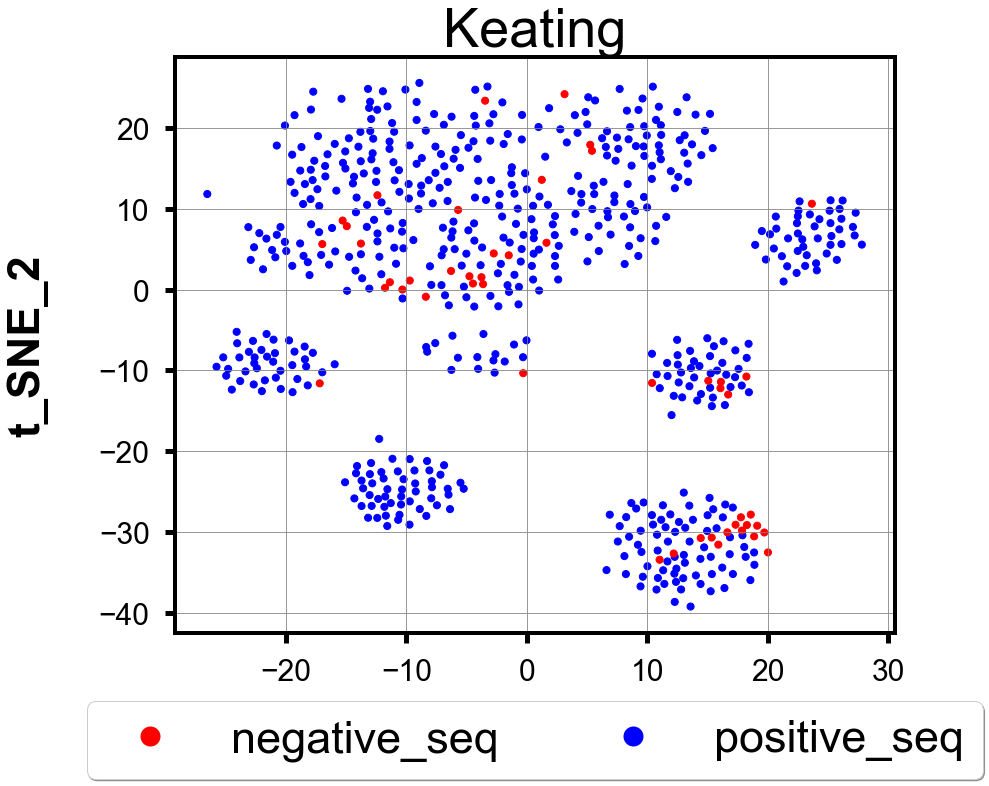

In [85]:
labels_dict = dict(zip(list(np.unique(df['class'].values)),color_list))
labels_dict_legend = {'negative_seq':'red', 'positive_seq': 'blue'}
plt.rcParams.update({'font.size': 45})
mpl.rcParams['font.family'] = 'Arial'
fig = plt.figure(figsize=(20,10))
ax = fig.add_axes((0.1,0.1,0.5,0.8))
ax.spines['right'].set_visible(True)
ax.spines['right'].set_linewidth(4)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_visible(True)
ax.spines['top'].set_linewidth(4)
ax.tick_params(axis='both',which='major',direction='out',length=10,width=5,color='black',pad=15,labelsize=30,
                   labelcolor='black',
                   labelrotation=0)
    
    
ax.scatter(df['t_SNE_1'],df['t_SNE_2'], s = 50, c = df['class'].map(labels_dict))

legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=20, 
                      markeredgecolor = 'none') for k, v in
               labels_dict_legend.items()]
plt.legend(handles=legend_elements
                ,loc='upper center'
                , bbox_to_anchor=(0.5, -0.08)
                ,fancybox=True
                ,shadow=True
                ,ncol=3
                ,scatterpoints=1
          )
plt.grid(color='gray', linestyle='-')
plt.title("Keating")
plt.xlabel('t_SNE_1', fontsize=45,labelpad=50)
plt.ylabel('t_SNE_2', fontsize=45,weight='bold',labelpad=50)

In [86]:
labels_dict

{0.0: 'red', 1.0: 'blue'}

In [87]:
def clustering_figure(df, clustering_method, labels_dict, title):
    plt.rcParams.update({'font.size': 45})
    mpl.rcParams['font.family'] = 'Arial'
    fig = plt.figure(figsize=(20, 10),dpi=300)
    ax = fig.add_axes((0.1,0.1,0.6,0.9))
    ax.spines['right'].set_visible(True)
    ax.spines['right'].set_linewidth(2)
    ax.spines['left'].set_visible(True)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_visible(True)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['top'].set_visible(True)
    ax.spines['top'].set_linewidth(2)
    ax.tick_params(axis='both',which='major',direction='in',length=5,width=2,color='black',pad=10,labelsize=25,
                   labelcolor='black',
                   labelrotation=0)
    
    ax.scatter(df['t_SNE_1'],df['t_SNE_2'],c = df[clustering_method].map(labels_dict), s = 100)
    plt.title("{}".format(title), fontsize=30, weight='bold')
    plt.xlabel('t-SNE 1', fontsize=30)
    plt.ylabel('t-SNE 2', fontsize=30)
    plt.savefig("{}.png".format(title), bbox_inches='tight',pad_inches=0.6)

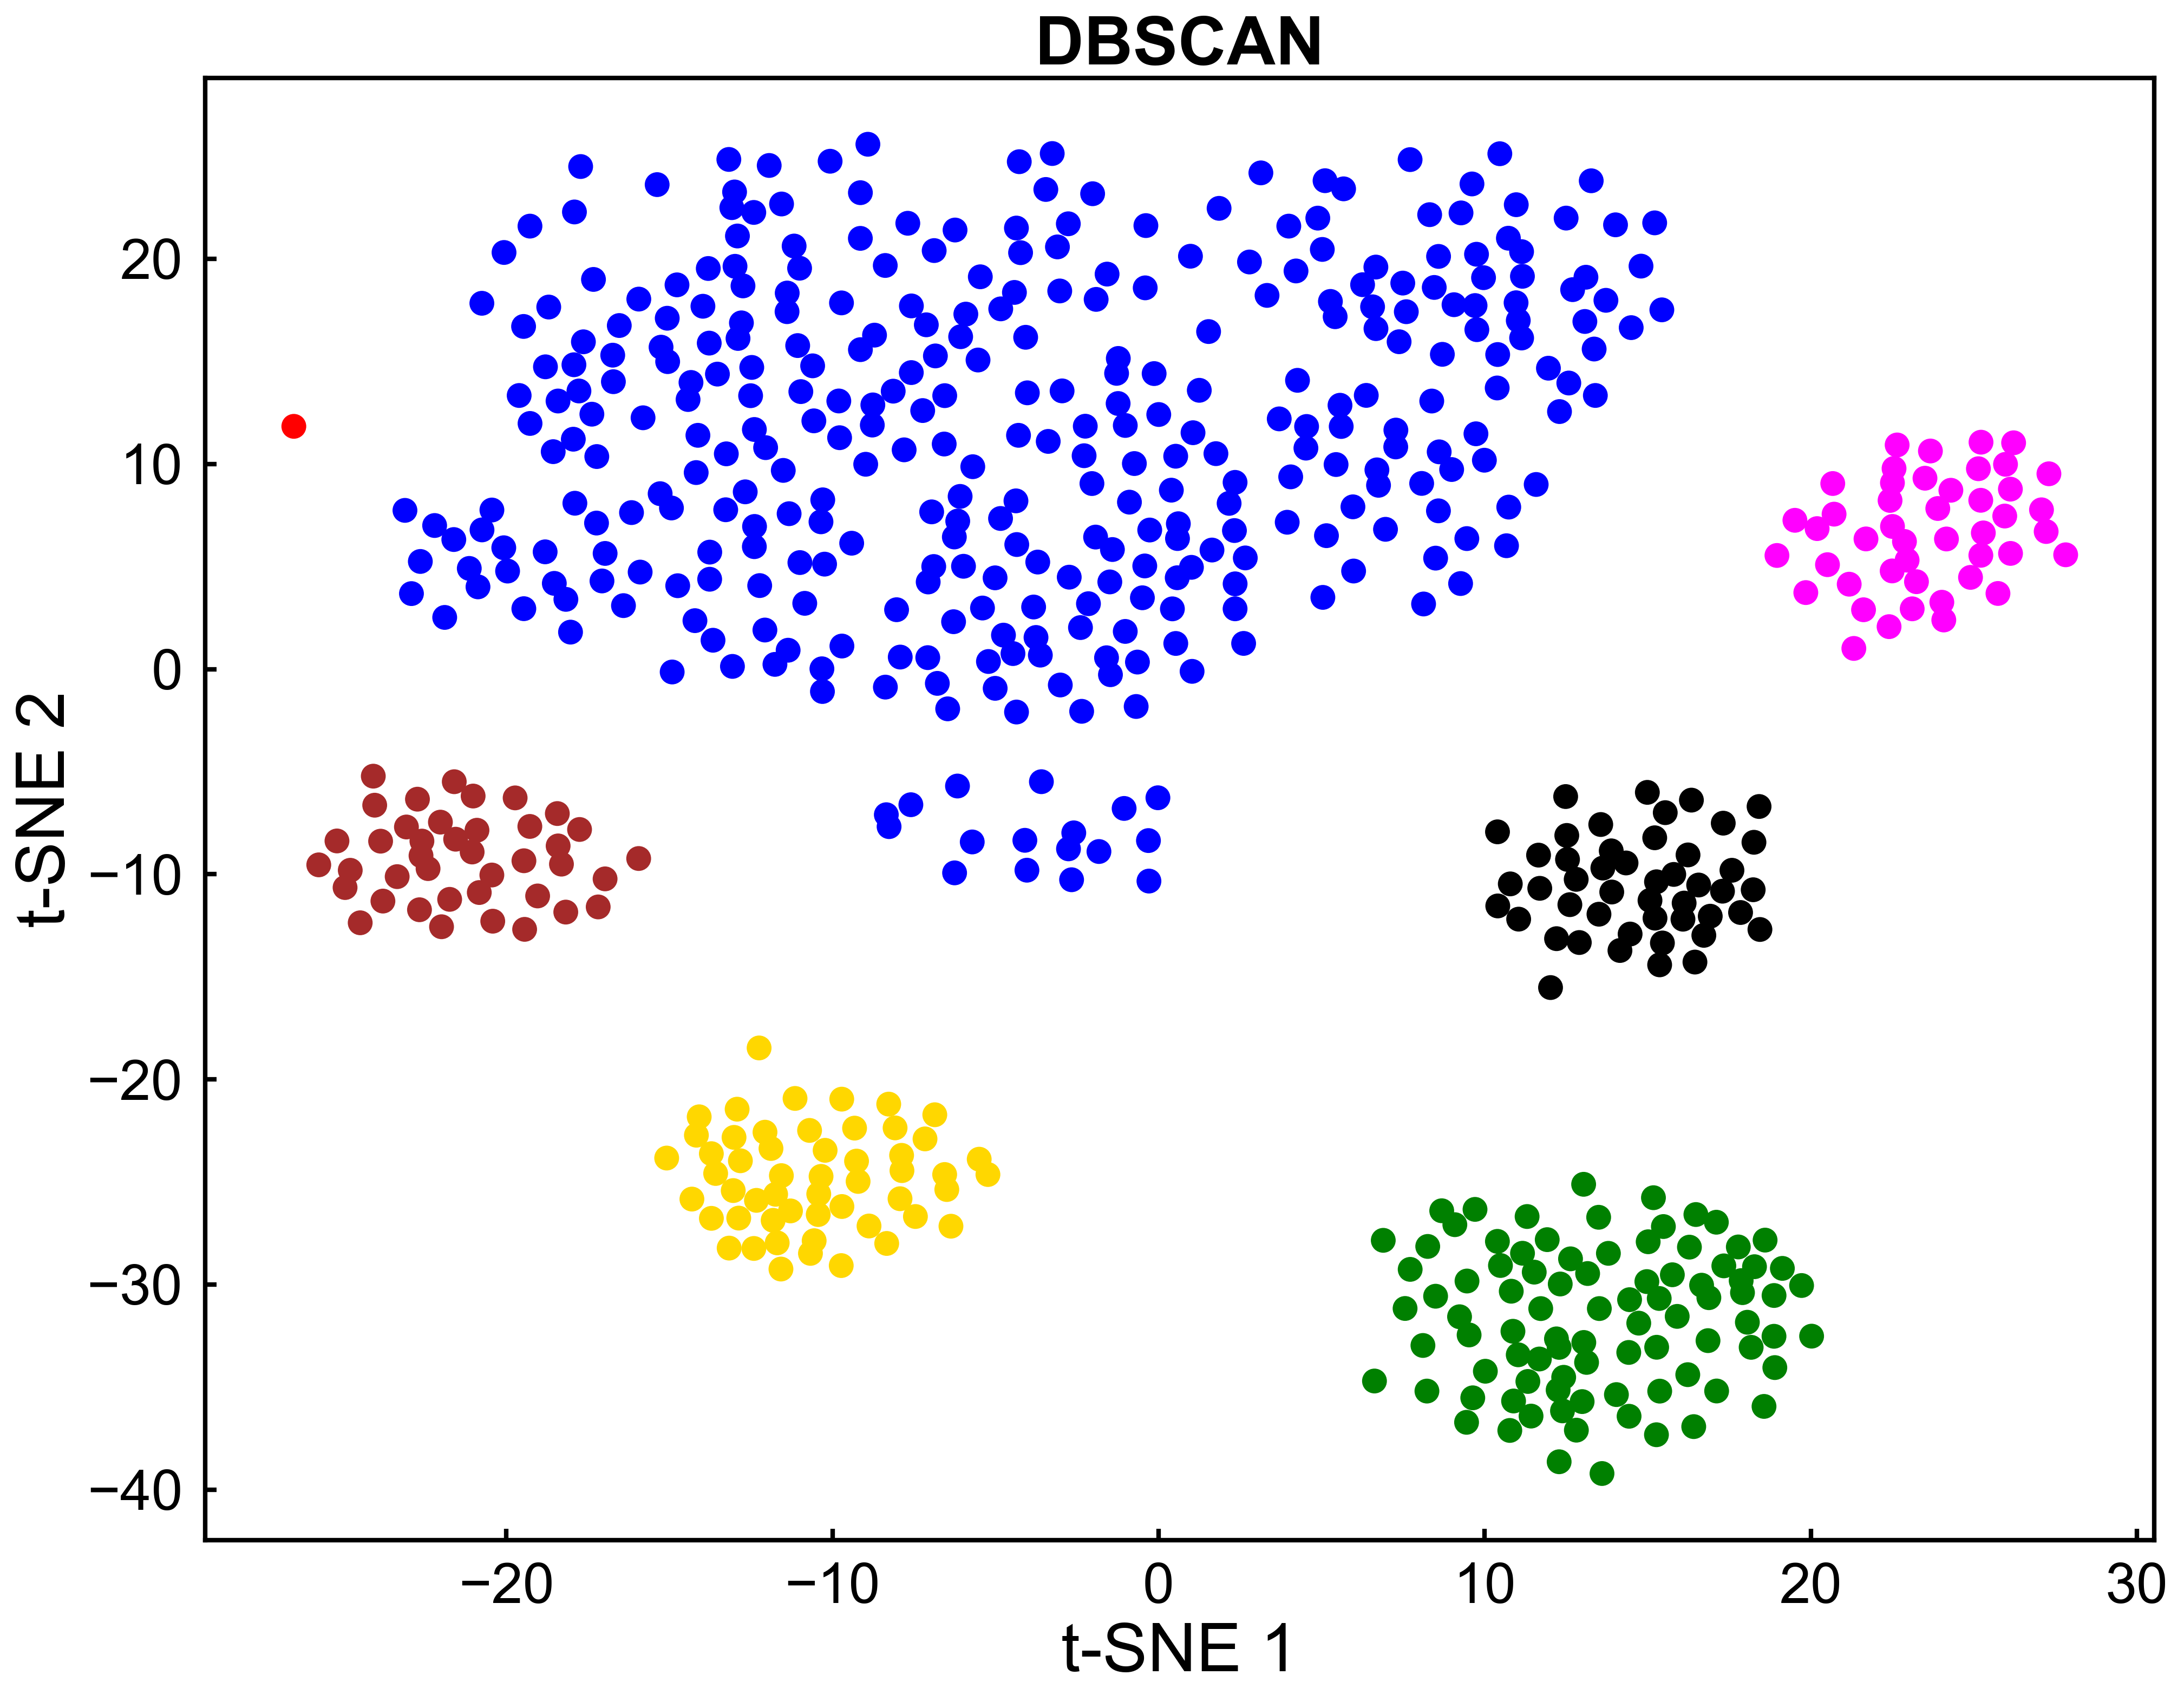

In [88]:
clustering = DBSCAN(eps=6, min_samples=20).fit(X)
dbscan_labels = clustering.labels_
df['DBSCAN'] = clustering.labels_
labels_dict = dict(zip(np.unique(dbscan_labels),color_list))
clustering_figure(df, 'DBSCAN', labels_dict,'DBSCAN')

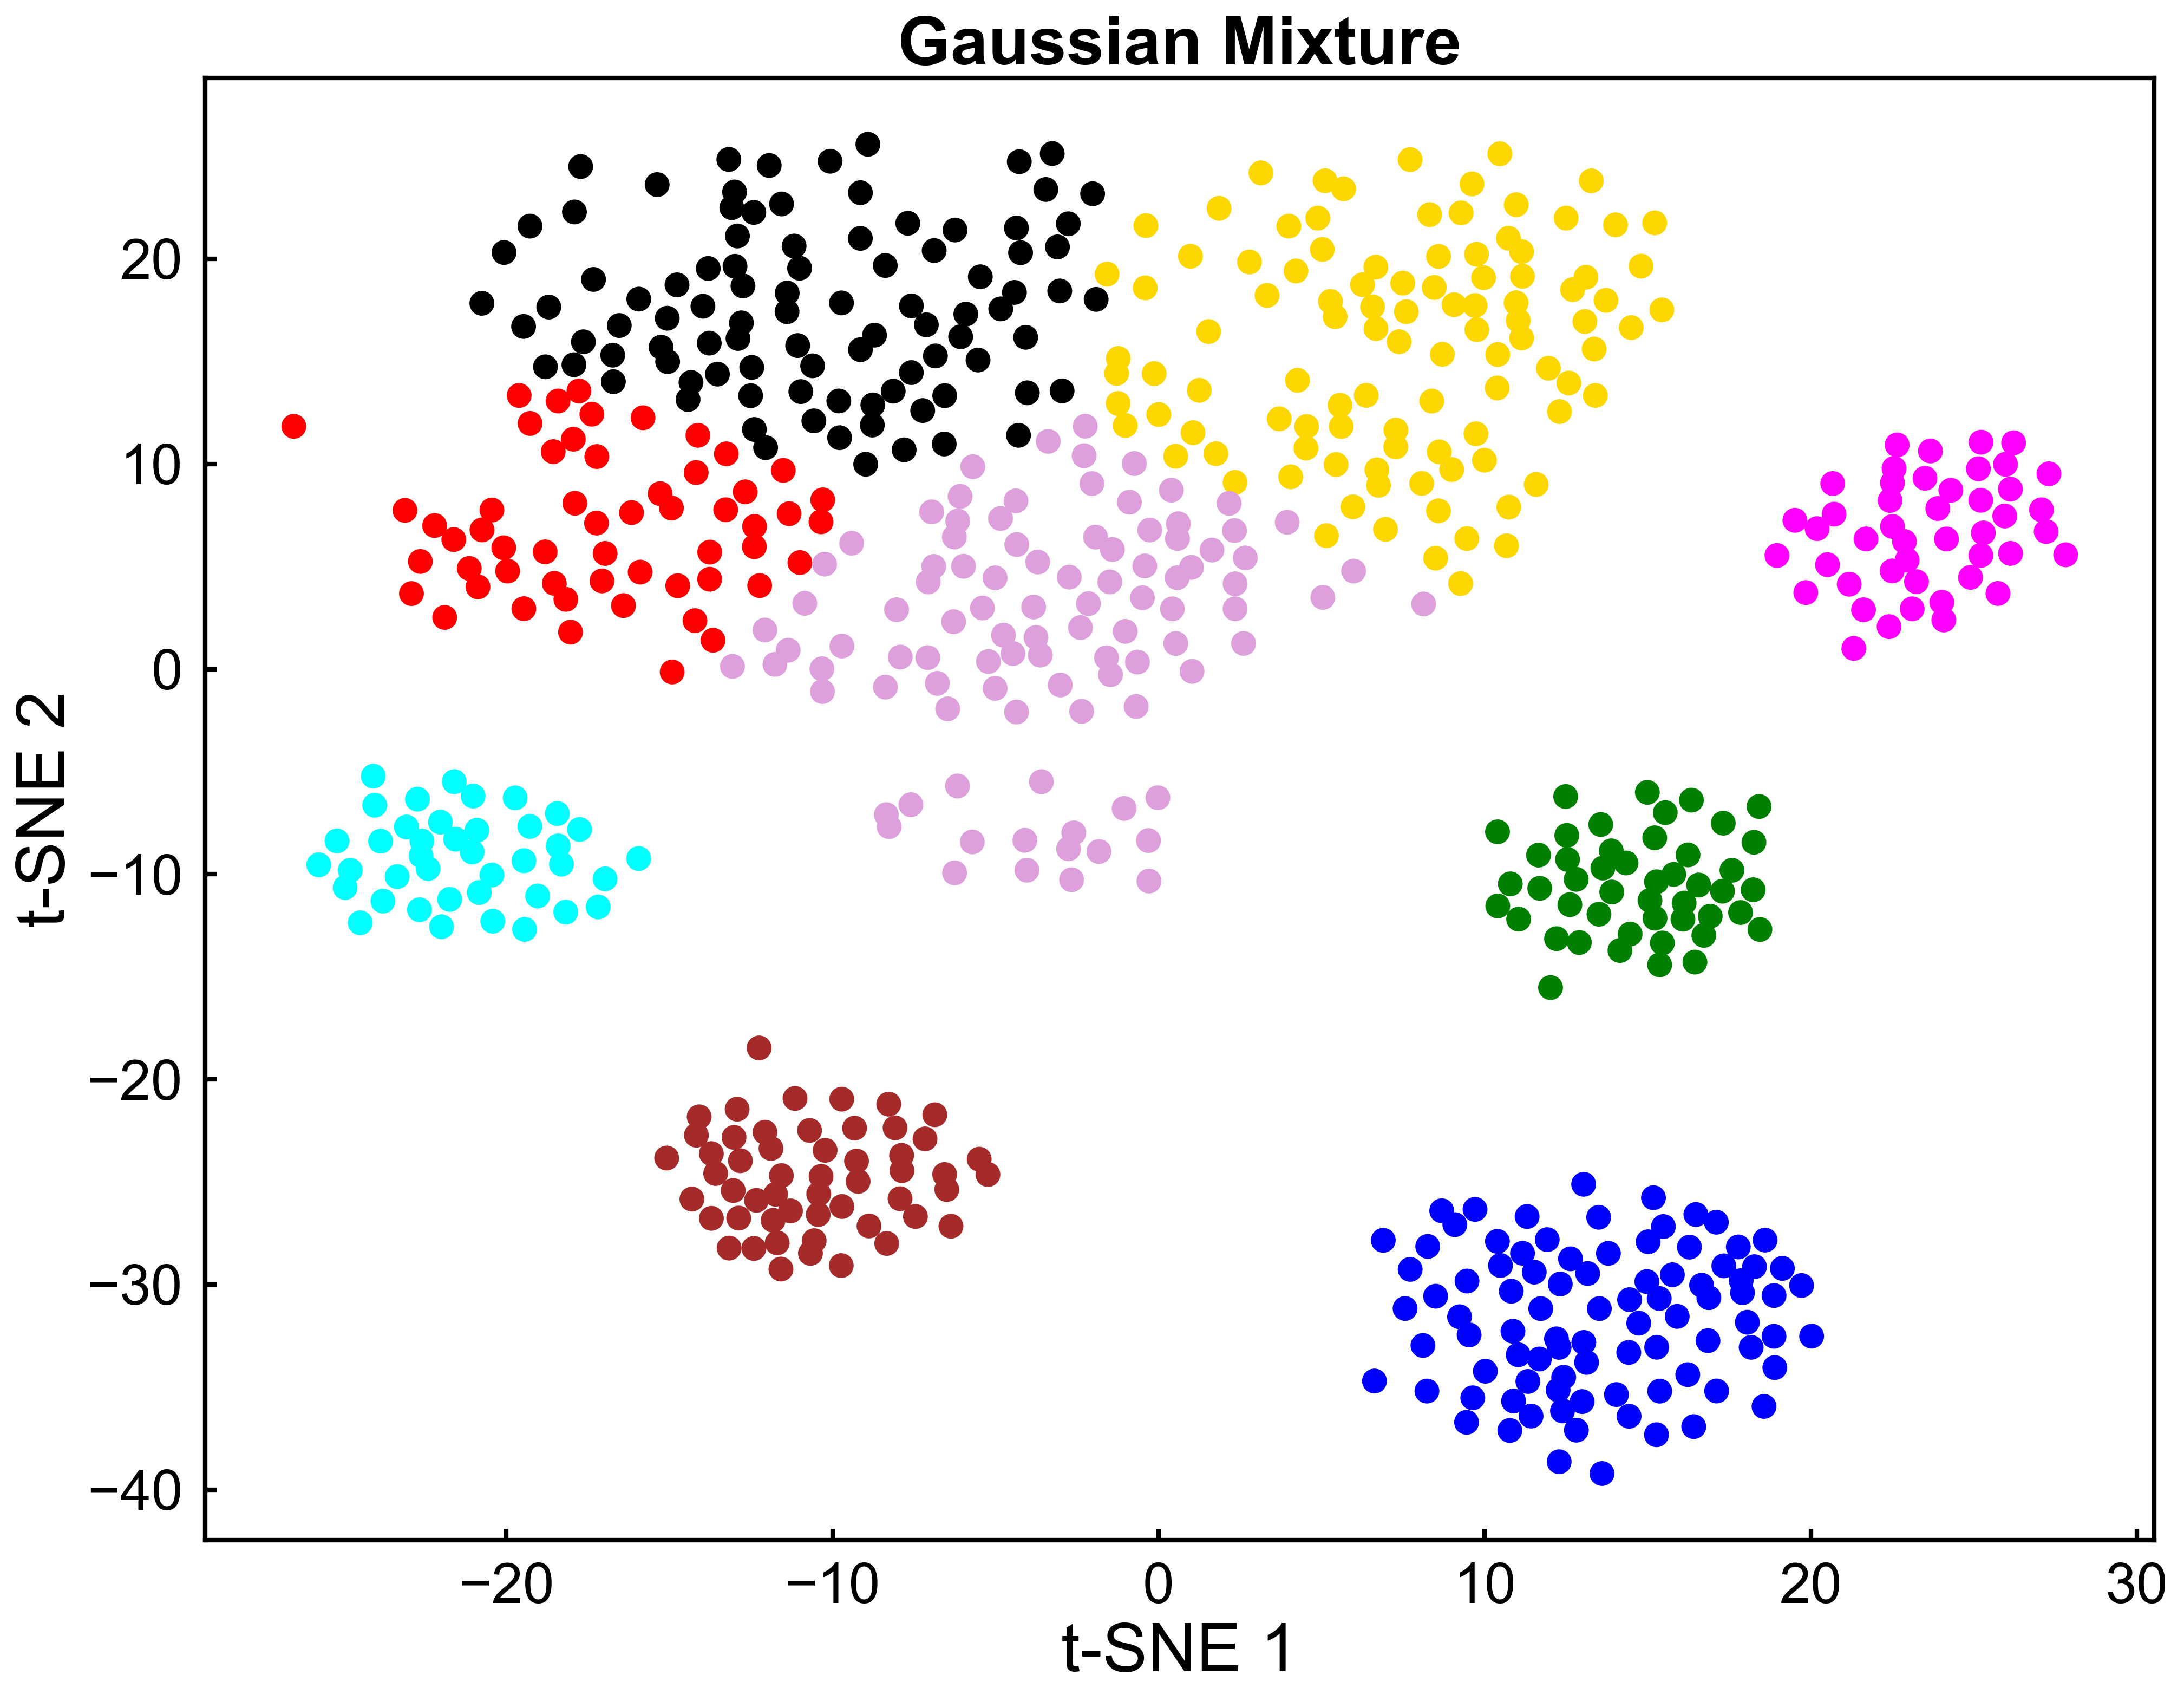

In [89]:
gm = chan eps The (n_components=9, covariance_type='spherical',max_iter=5000,init_params='kmeans').fit(X)
gauss_labels = gm.predict(X)
df['Gaussian_Mixture'] = gauss_labels

labels_dict = dict(zip(np.unique(gauss_labels),color_list))
clustering_figure(df, 'Gaussian_Mixture', labels_dict,'Gaussian Mixture')

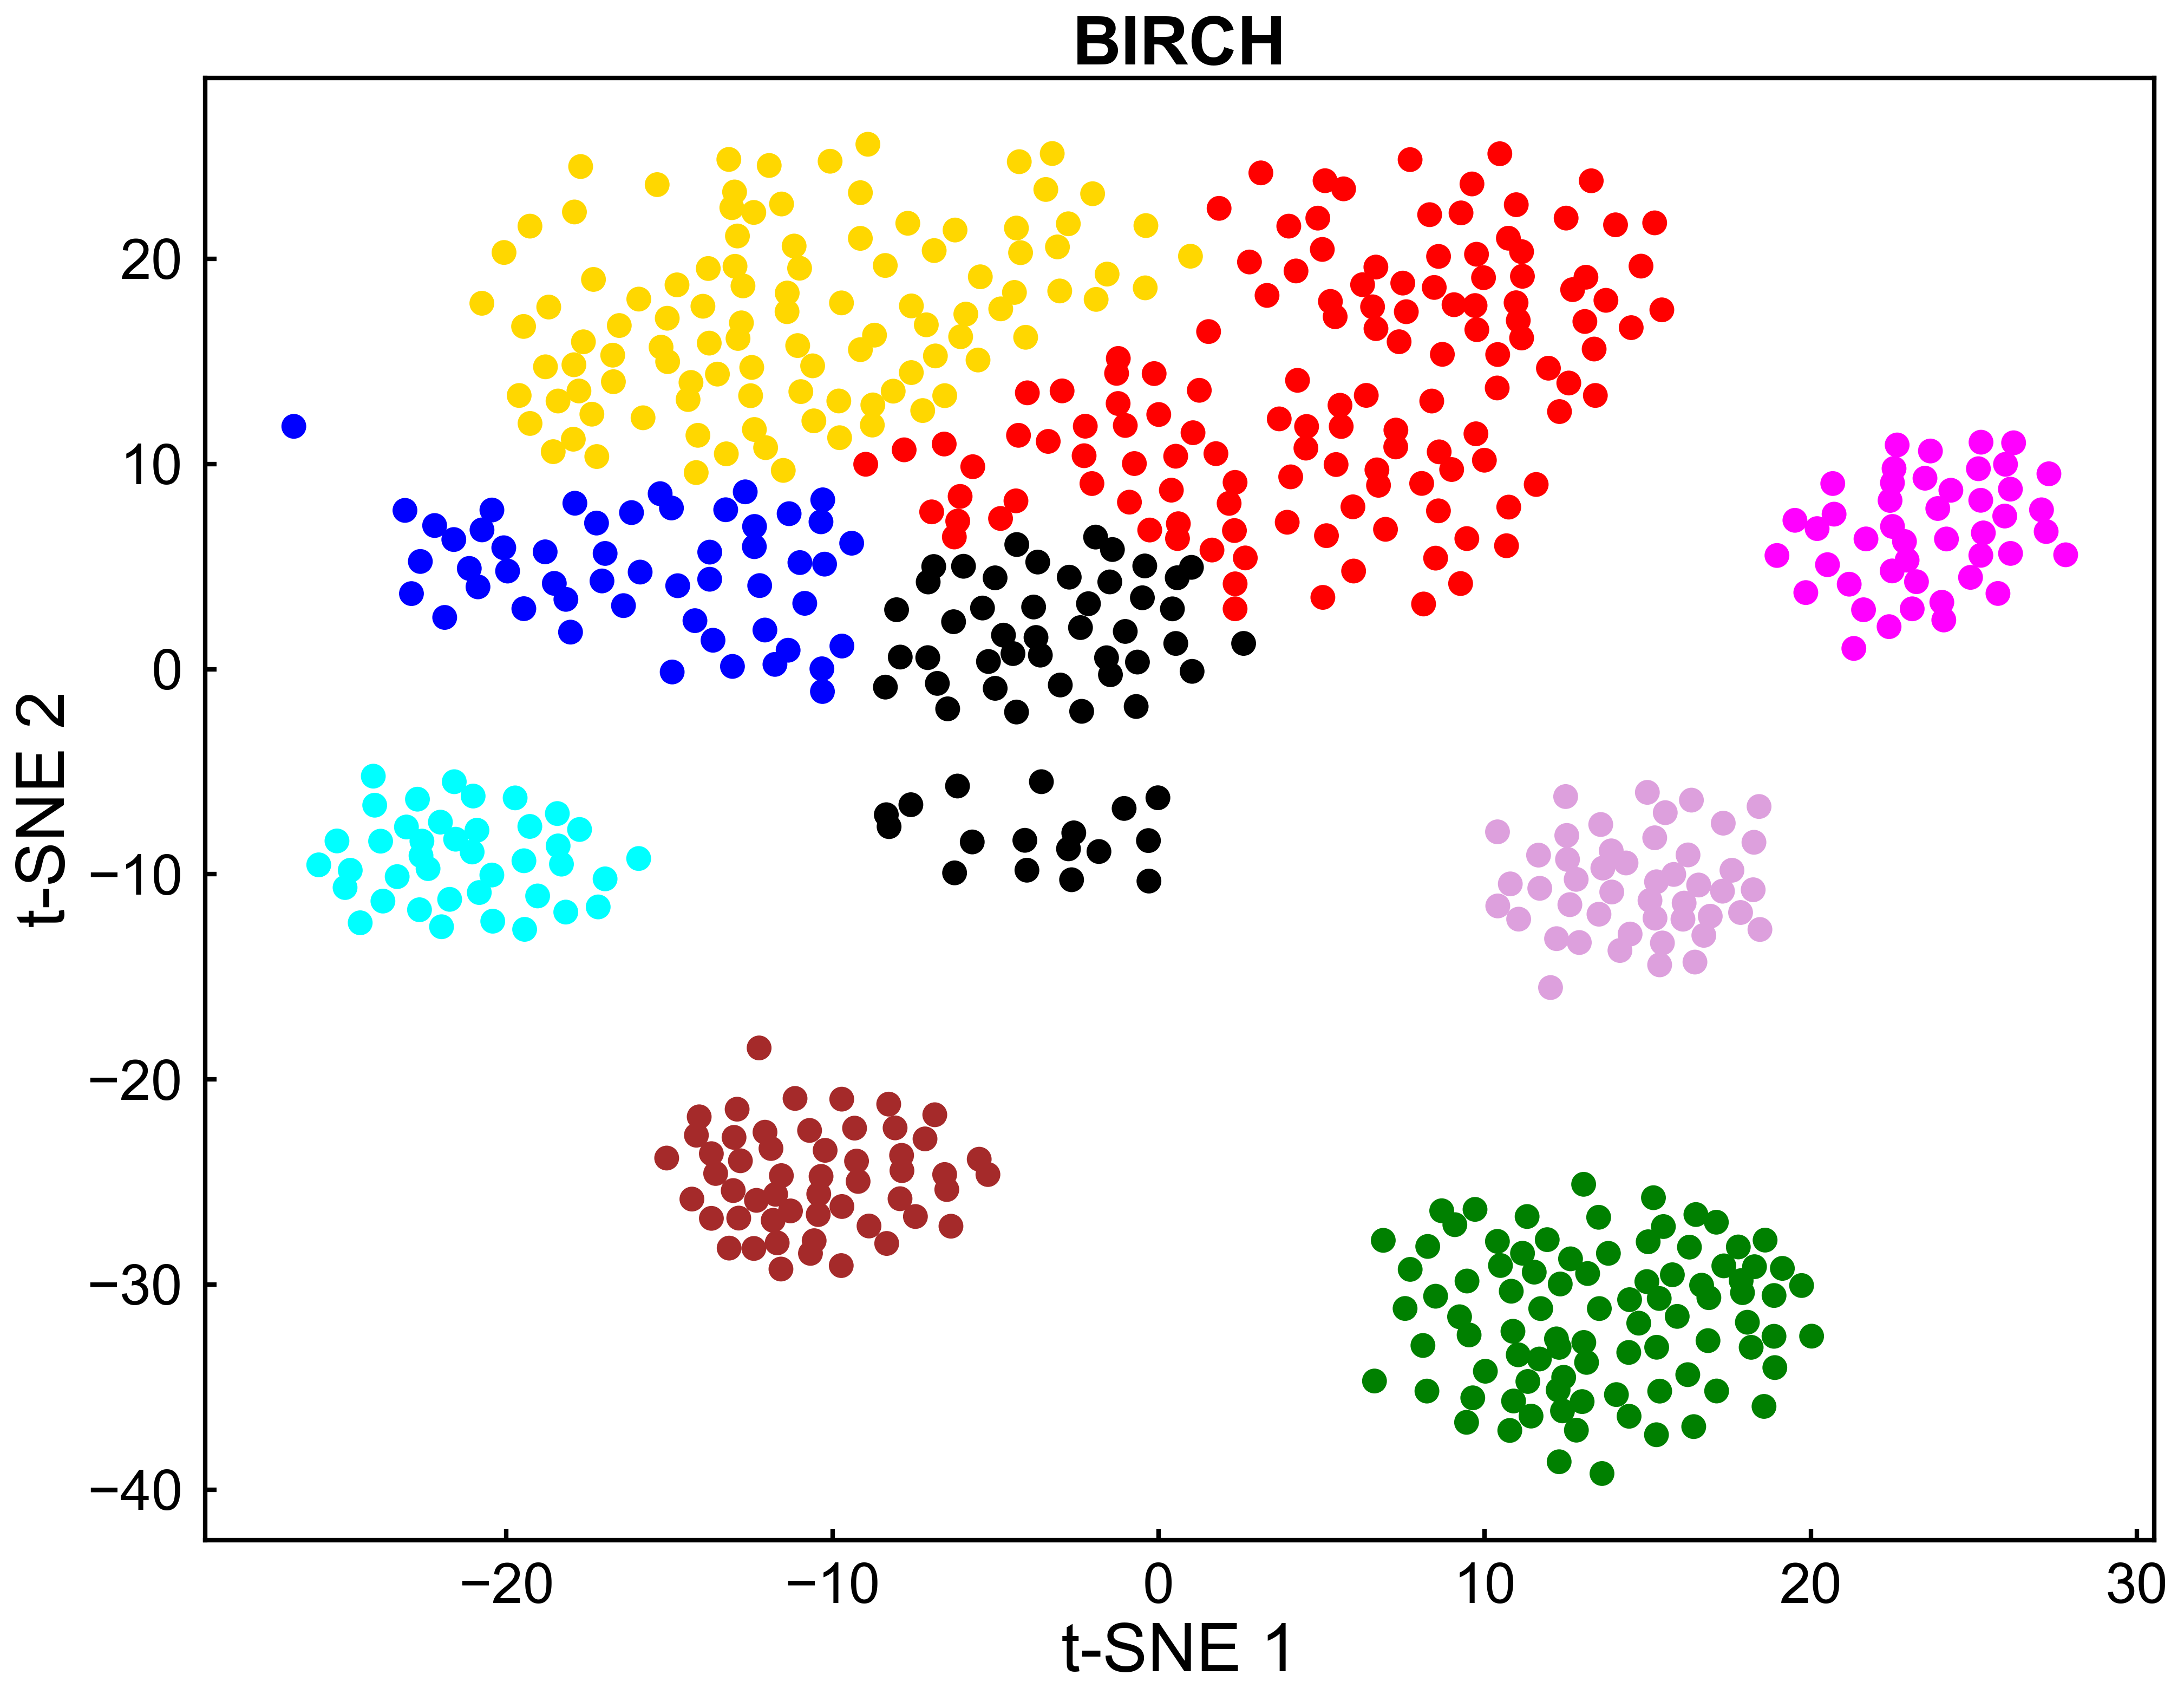

In [90]:
brc = Birch(n_clusters=9, threshold=0.5).fit(X)
brc_labels = brc.labels_
df['BIRCH'] = brc_labels
labels_dict = dict(zip(np.unique(brc_labels),color_list))
clustering_figure(df, 'BIRCH', labels_dict,'BIRCH')

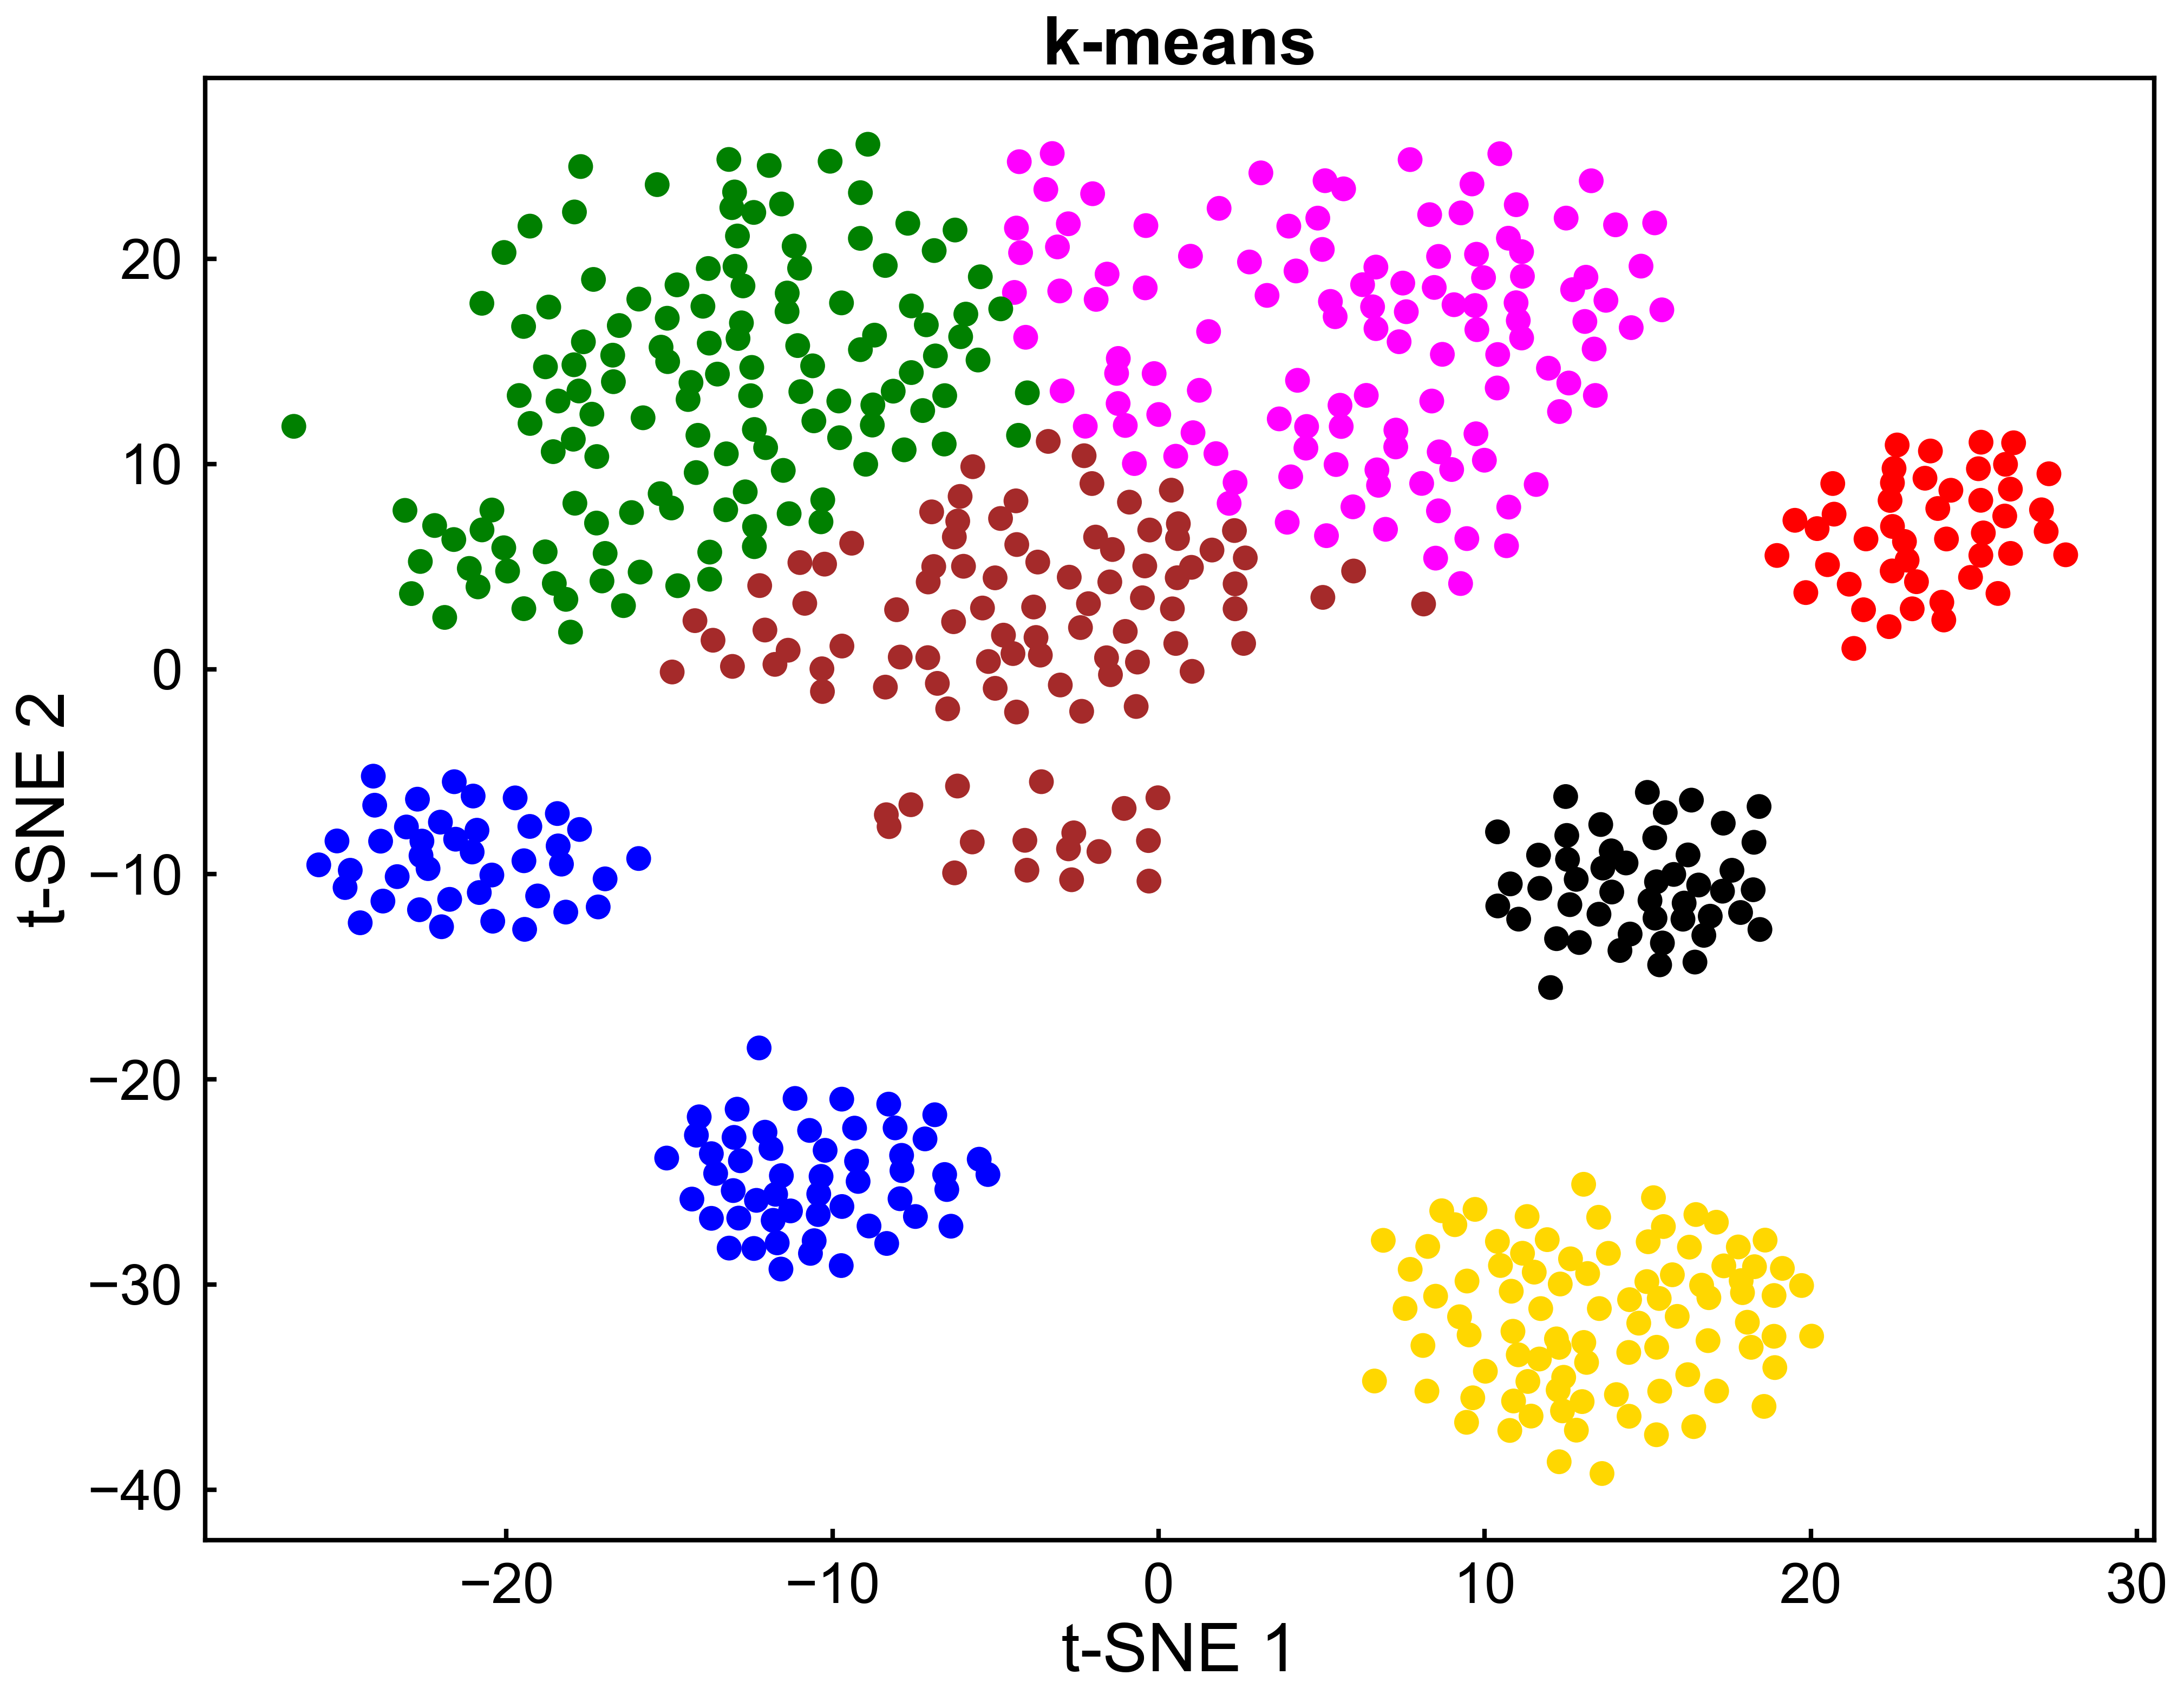

In [91]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(X)
kmeans_labels = kmeans.labels_
df['k-means'] = kmeans_labels
labels_dict = dict(zip(np.unique(kmeans_labels),color_list))
clustering_figure(df, 'k-means', labels_dict,'k-means')

In [95]:
from PIL import Image
  
img_01 = Image.open("DBSCAN.png")
img_02 = Image.open("BIRCH.png")
img_03 = Image.open("Gaussian Mixture.png")
img_04 = Image.open("k-means.png")
  
img_01_size = img_01.size
img_02_size = img_02.size
img_03_size = img_02.size
img_02_size = img_02.size
  
print('img 1 size: ', img_01_size)
print('img 2 size: ', img_02_size)
print('img 3 size: ', img_03_size)
print('img 4 size: ', img_03_size)
  
new_im = Image.new('RGB', (2*img_01_size[0],2*img_01_size[1]), (250,250,250))
  
new_im.paste(img_01, (0,0))
new_im.paste(img_02, (img_01_size[0],0))
new_im.paste(img_03, (0,img_01_size[1]))
new_im.paste(img_04, (img_01_size[0],img_01_size[1]))
  
new_im.save("t-sne.png", "PNG")

img 1 size:  (4334, 3441)
img 2 size:  (4334, 3441)
img 3 size:  (4334, 3441)
img 4 size:  (4334, 3441)


In [96]:
image = Image.open("t-sne.png")
right,left,top,bottom = 0, 0,700, 0
width, height = image.size
new_width = width + right + left
new_height = height + top + bottom
result = Image.new(image.mode, (new_width, new_height), (255, 255, 255))
result.paste(image, (left, top))
result.save('t-sne.png')
msg = "18 nt-C*CATTCCGCT motif"
img = Image.open("t-sne.png")
font = ImageFont.truetype("FONTS/arial.ttf", 250)
draw = ImageDraw.Draw(img)
w, h = draw.textsize(msg, font=font)
draw.text(((img.size[0]-w)/2,350),"18 nt-C*CATTCCGCT motif",(0,0,0),font=font)
img.save('t-sne.png')

5612


In [ ]:
clustering = DBSCAN(eps=6, min_samples=20).fit(X)
dbscan_labels = clustering.labels_
df['DBSCAN'] = clustering.labels_
labels_dict = dict(zip(np.unique(dbscan_labels),color_list))
plt.rcParams.update({'font.size': 45})
mpl.rcParams['font.family'] = 'Arial'
fig = plt.figure(figsize=(20,10))
# plt.rcParams.update({'font.size': 200,'figure.dpi':50})
ax = fig.add_axes((0.1,0.1,0.5,0.8))
ax.spines['right'].set_visible(True)
ax.spines['right'].set_linewidth(4)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_visible(True)
ax.spines['top'].set_linewidth(4)
ax.tick_params(axis='both',which='major',direction='out',length=10,width=5,color='black',pad=15,labelsize=30,
                   labelcolor='black',
                   labelrotation=0)
    
# plt.rcParams.update({'font.size': 200,'figure.dpi':50})
# plt.subplots(figsize=(150, 150))
ax.scatter(df['t_SNE_1'],df['t_SNE_2'],c = df['DBSCAN'].map(labels_dict), s = 50)
# plt.grid(color='gray', linestyle='-')
# matplotlib.figure.add_axes((0.1,0.1,0.5,0.8))
plt.title("DBSCAN keating", fontsize=35)
plt.xlabel('t_SNE_1', fontsize=35)
plt.ylabel('t_SNE_2', fontsize=35)


In [ ]:
gm = GaussianMixture(n_components=9, covariance_type='spherical',max_iter=5000,init_params='kmeans').fit(X)
gauss_labels = gm.predict(X)
df['Gaussian_Mixture'] = gauss_labels

labels_dict = dict(zip(np.unique(gauss_labels),color_list))

plt.rcParams.update({'font.size': 45})
mpl.rcParams['font.family'] = 'Arial'
fig = plt.figure(figsize=(20,10))
# plt.rcParams.update({'font.size': 200,'figure.dpi':50})
ax = fig.add_axes((0.1,0.1,0.5,0.8))
ax.spines['right'].set_visible(True)
ax.spines['right'].set_linewidth(4)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_visible(True)
ax.spines['top'].set_linewidth(4)
ax.tick_params(axis='both',which='major',direction='out',length=10,width=5,color='black',pad=15,labelsize=30,
                   labelcolor='black',
                   labelrotation=0)


ax.scatter(df['t_SNE_1'],df['t_SNE_2'],c = df['Gaussian_Mixture'].map(labels_dict), s = 50)

# plt.grid(color='gray', linestyle='-')
# matplotlib.figure.add_axes((0.1,0.1,0.5,0.8))
plt.title("Gaussian Mixture keating", fontsize=35)
plt.xlabel('t_SNE_1', fontsize=35)
plt.ylabel('t_SNE_2', fontsize=35)


In [ ]:
brc = Birch(n_clusters=9, threshold=0.5).fit(X)
brc_labels = brc.labels_
df['BIRCH'] = brc_labels
labels_dict = dict(zip(np.unique(brc_labels),color_list))

plt.rcParams.update({'font.size': 45})
mpl.rcParams['font.family'] = 'Arial'
fig = plt.figure(figsize=(20,10))
# plt.rcParams.update({'font.size': 200,'figure.dpi':50})
ax = fig.add_axes((0.1,0.1,0.5,0.8))
ax.spines['right'].set_visible(True)
ax.spines['right'].set_linewidth(4)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_visible(True)
ax.spines['top'].set_linewidth(4)
ax.tick_params(axis='both',which='major',direction='out',length=10,width=5,color='black',pad=15,labelsize=30,
                   labelcolor='black',
                   labelrotation=0)


plt.scatter(df['t_SNE_1'],df['t_SNE_2'],c = df['BIRCH'].map(labels_dict), s = 50)


# plt.grid(color='gray', linestyle='-')
# matplotlib.figure.add_axes((0.1,0.1,0.5,0.8))
plt.title("Gaussian Mixture keating", fontsize=35)
plt.xlabel('t_SNE_1', fontsize=35)
plt.ylabel('t_SNE_2', fontsize=35)

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(X)
kmeans_labels = kmeans.labels_
df['k-means'] = kmeans_labels
labels_dict = dict(zip(np.unique(kmeans_labels),color_list))

plt.rcParams.update({'font.size': 45})
mpl.rcParams['font.family'] = 'Arial'
fig = plt.figure(figsize=(20,10))
# plt.rcParams.update({'font.size': 200,'figure.dpi':50})
ax = fig.add_axes((0.1,0.1,0.5,0.8))
ax.spines['right'].set_visible(True)
ax.spines['right'].set_linewidth(4)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_visible(True)
ax.spines['top'].set_linewidth(4)
ax.tick_params(axis='both',which='major',direction='out',length=10,width=5,color='black',pad=15,labelsize=30,
                   labelcolor='black',
                   labelrotation=0)

plt.scatter(df['t_SNE_1'],df['t_SNE_2'],c = df['k-means'].map(labels_dict), s = 50)

plt.title("K-means keating", fontsize=35)
plt.xlabel('t_SNE_1', fontsize=35)
plt.ylabel('t_SNE_2', fontsize=35)

In [ ]:
df.to_csv('clusters_keating.csv', index = False)

In [14]:
from PIL import Image
  
img_01 = Image.open("BIRCH.png")
img_02 = Image.open("DBSCAN.png")
img_03 = Image.open("Gaussian Mixture.png")
img_04 = Image.open("k-means.png")
  
img_01_size = img_01.size
img_02_size = img_02.size
img_03_size = img_02.size
img_02_size = img_02.size
  
print('img 1 size: ', img_01_size)
print('img 2 size: ', img_02_size)
print('img 3 size: ', img_03_size)
print('img 4 size: ', img_03_size)
  
new_im = Image.new('RGB', (2*img_01_size[0],2*img_01_size[1]), (250,250,250))
  
new_im.paste(img_01, (0,0))
new_im.paste(img_02, (img_01_size[0],0))
new_im.paste(img_03, (0,img_01_size[1]))
new_im.paste(img_04, (img_01_size[0],img_01_size[1]))
  
new_im.save("merged_images.png", "PNG")
new_im.show()

img 1 size:  (4034, 3141)
img 2 size:  (4034, 3141)
img 3 size:  (4034, 3141)
img 4 size:  (4034, 3141)


<div class="markdown-google-sans">
  <h1>What is Colab?</h1>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with 
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!